一、User Model
===============
在 Django 當中已經內建了 User 的 Model，不需要特別去寫 models.py，我們只需要知道如何用即可。

* User
* Permission
* Group

這三個 Model 是我們做網站時管理帳號最常用的三角關係。彼此間皆為多對多的關係。目前我們先知道如何使用 User 即可。
User 這個 Model 就是紀錄所有帳戶資料(帳號username、密碼password...)，並且帳戶也有分權限(如: 普通、工作人員staff、超級管理員superuser)。

延伸學習: 如何客製化(加欄位)自己的 User Model https://docs.djangoproject.com/en/2.2/topics/auth/customizing/#substituting-a-custom-user-model

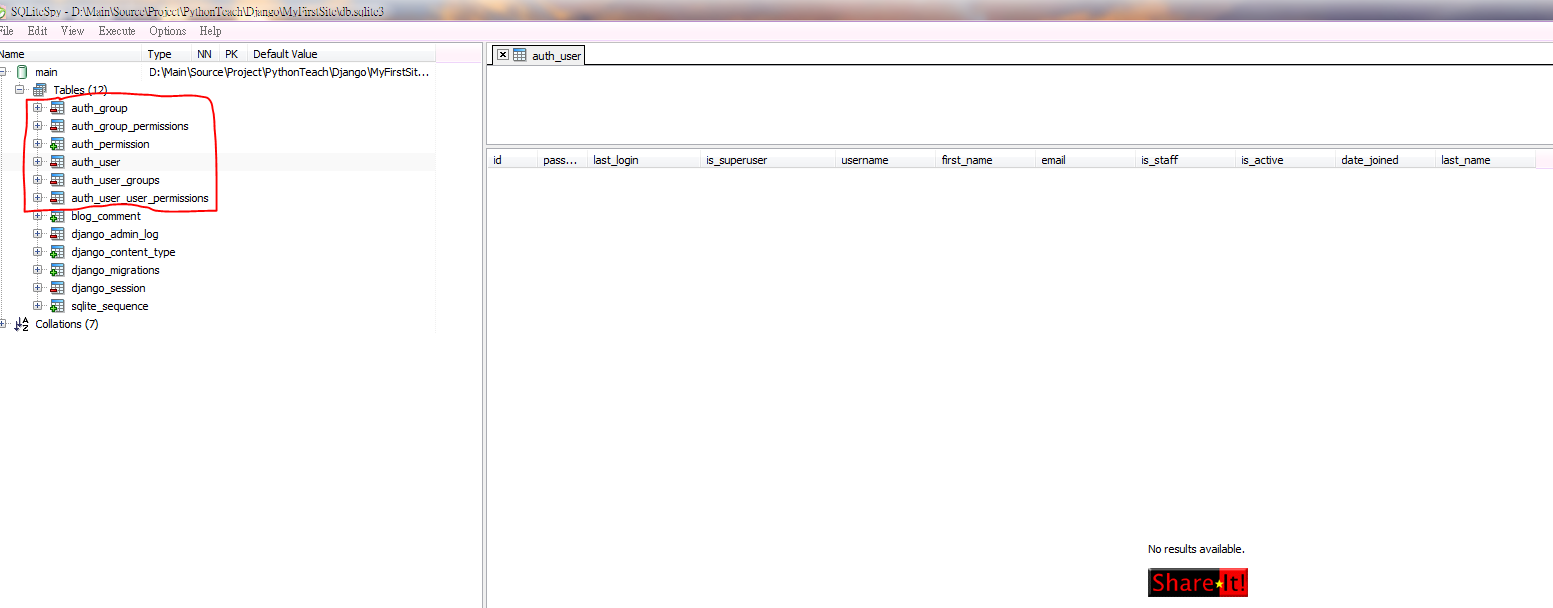

In [1]:
from IPython.display import Image
Image("images/P13.png")


我們先來 create 一個超級管理員帳號讓我們可以登入 Django 後台。

* python manage.py createsuperuser 

輸入好之後試著登入:

http://127.0.0.1:8000/admin/

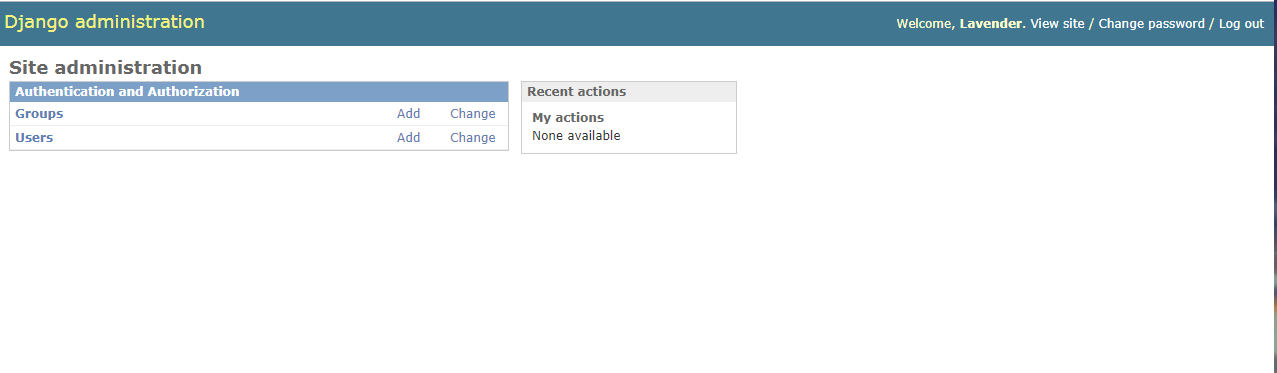

In [2]:
from IPython.display import Image
Image("images/P14.png")

如上圖，我們可以用超級管理員登入 Django 預設的後台(Django Admin)，用人性化的介面來操作 DB。如新增其他使用者帳戶。

關於 Django Admin 的詳細功能之後會有章節再講。

二、撰寫登入頁面(Login)
==========================
先設計好基本的網站樣子

* blog/index.html
* blog/nav_accounts.html

In [ ]:
<!DOCTYPE html>

<html>
    <head>
        <title>Index</title>
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css" integrity="sha384-JcKb8q3iqJ61gNV9KGb8thSsNjpSL0n8PARn9HuZOnIxN0hoP+VmmDGMN5t9UJ0Z" crossorigin="anonymous">
    </head>
    <body>
        {% include 'blog/nav_accounts.html' %}
        <h1>這是首頁</h1>
    </body>
</html>

In [ ]:
{% load i18n %}

<nav class="navbar navbar-expand-lg navbar-light bg-light">
  <div class="collapse navbar-collapse" id="navbarSupportedContent">
    <ul class="navbar-nav ml-auto">
      <li class="nav-item">
        <a class="nav-link" href="#">登入</a>
      </li>
      <li class="nav-item">
        <a class="nav-link" href="#">註冊</a>
      </li>
    </ul>
  </div>
</nav>

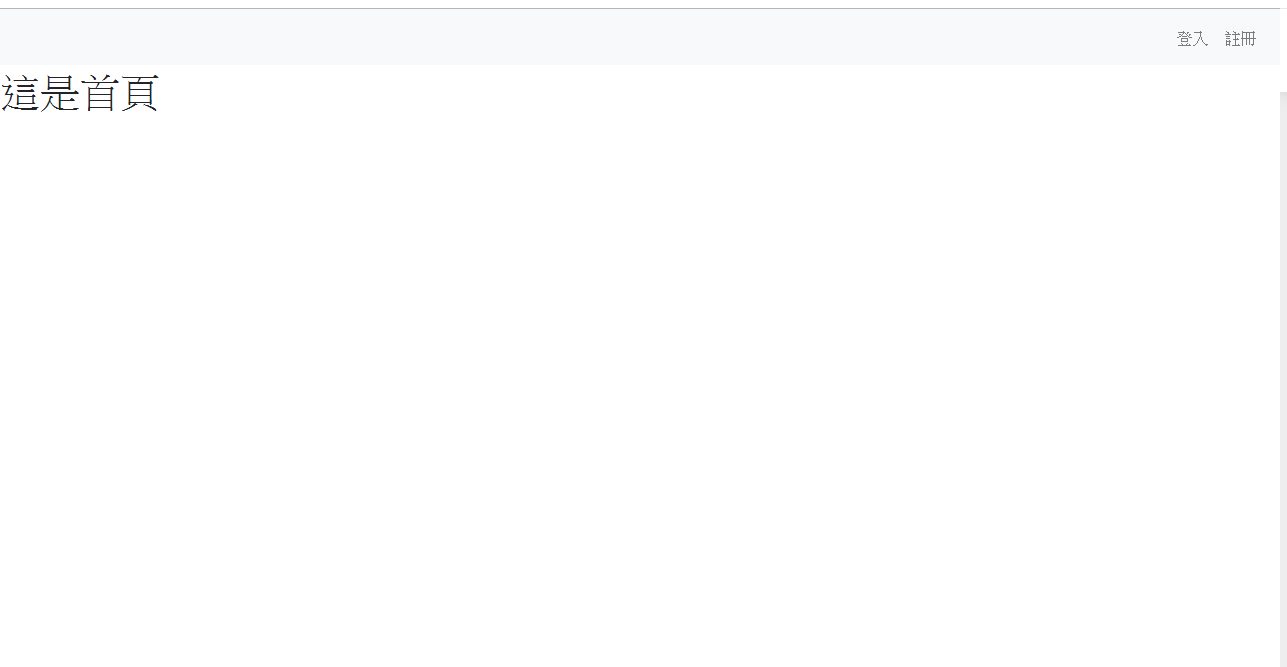

In [3]:
from IPython.display import Image
Image("images/P15.png")

接下來實作登入頁面的 view 與 template
* blog/login.html

In [ ]:
<!DOCTYPE html>

<html>
    <head>
        <title>Index</title>
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css" integrity="sha384-JcKb8q3iqJ61gNV9KGb8thSsNjpSL0n8PARn9HuZOnIxN0hoP+VmmDGMN5t9UJ0Z" crossorigin="anonymous">
    </head>
    <body>
        {% include 'blog/nav_accounts.html' %}
        <div class="container">
            <h1>這是 Login 頁</h1>

            <form method="POST" action=".">
                {% csrf_token %}
                <div class="form-group">
                    <label for="name">Username</label>
                    <input class="form-control" name="username" type="text" required>
                </div>
                <div class="form-group">
                    <label for="name">Password</label>
                    <input class="form-control" name="password" type="password" required>
                </div>
                <input class="btn btn-primary" type="submit">
            </form>
            
            <p>{{ msg }}</p>
        </div>
    </body>
</html>

In [ ]:
# blog/views.py

def login(request):
    if request.POST:
        pass
    return render(request, 'blog/login.html')

# MyFirstSite/urls.py

path('login/', blog_views.login), # 在 urlpatterns 中加入這一排

連結到 http://127.0.0.1:8000/login/ 確認可以看到頁面

已經做好大致上的架構了，接下來我們要來連接頁面(也就是使用 a href="url" 的方式連結)。

* 最簡單的方式是直接在 a href 內輸入指定頁面的 url 即可(href="/login/")
* 使用 template tag (href="{% url 'login' %}"

在寫 Django 最好盡量用 template tag，這樣比較好統一管理 url，避免在想換 url 的時候要改很多 html 造成麻煩。

In [ ]:
# MyFirstSite/urls.py

path('login/', blog_views.login, name="login"), # 修改這排(加入 name，名字通常自己命名那頁的名稱)

path('', blog_views.index, name="index"), # 順便修這排

修改 blog/nav_accounts.html，讓他有連結可以到 login 頁

In [ ]:
<li class="nav-item">
    <a class="nav-link" href="{% url 'login' %}">登入</a>
</li>

到 http://127.0.0.1:8000/ 確認按下"登入"能夠到 Login 頁

接下來，實作登入的程式碼

In [ ]:
# blog/views.py
from django.shortcuts import render, redirect
from django.contrib import auth
from django.urls import reverse_lazy

def login(request):
    if request.POST:
        # 當使用者 POST 表單後運行這部分程式碼
        username = request.POST.get('username')
        password = request.POST.get('password')

        # 用 auth.authenticate 來找 db 內是否有這筆帳戶資料
        user = auth.authenticate(username=username, password=password)

        if user and user.is_active: # 判斷 user 是否存在，且沒有被凍結
            # 允許登入
            auth.login(request, user)
            return redirect(reverse_lazy('index')) # 進行導頁到 index(跟 template tag url 一樣，參數是剛剛在 urls.py 取的名稱)
        else:     
            # 不允許登入
            context = {
                "msg": "登入失敗",
            }
            return render(request, 'blog/login.html', context)

    return render(request, 'blog/login.html')

到 http://127.0.0.1:8000/login/ 試著登入看看(可以先輸入錯的帳號來看看樣子)，登入成功後會被導頁到指定頁面(Redirect)，上面的 view 是寫導到 index

接下來實作讓 template 判斷使用者是否登入而 render 不同的頁面出來

修改 blog/nav_accounts.html

* request.user.is_authenticated 如果遇到使用者已經登入了，會回傳 True

我們這邊設計當使用者登入後，nav 可以看到自己的 username 與"登出"，沒登入則只能看到"登入"與"註冊"

In [ ]:
{% load i18n %}

<nav class="navbar navbar-expand-lg navbar-light bg-light">
  <div class="collapse navbar-collapse" id="navbarSupportedContent">
    <ul class="navbar-nav ml-auto">
      {% if request.user.is_authenticated %}
        <li class="nav-item">
          <a class="nav-link" href="#">{{ request.user.username }}</a>
        </li>
        <li class="nav-item">
            <a class="nav-link" href="#">登出</a>
          </li>
      {% else %}
        <li class="nav-item">
          <a class="nav-link" href="{% url 'login' %}">登入</a>
        </li>
        <li class="nav-item">
          <a class="nav-link" href="#">註冊</a>
        </li>
      {% endif %}
    </ul>
  </div>
</nav>

登入後，確認頁面是否有變化

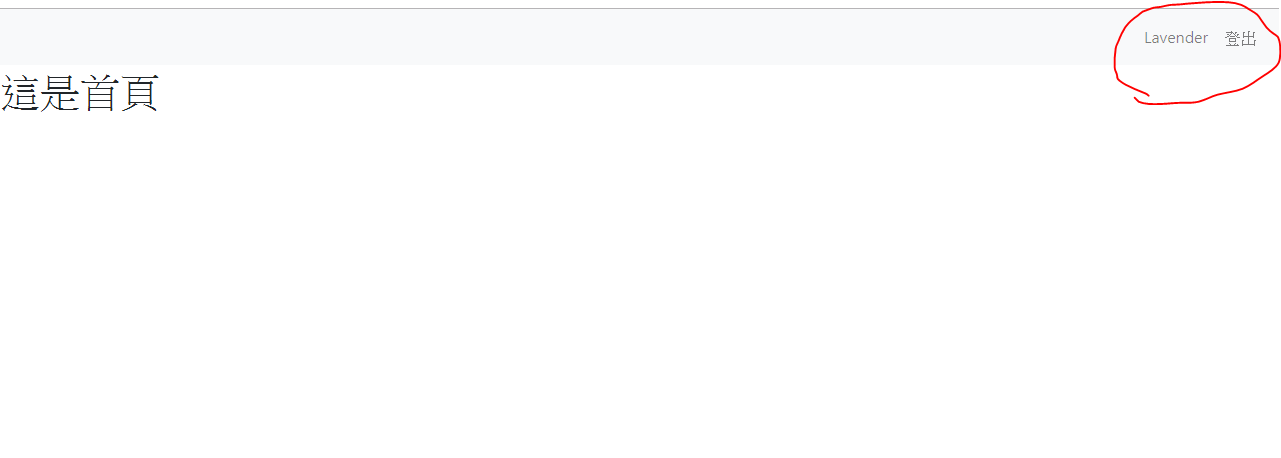

In [11]:
from IPython.display import Image
Image("images/P16.png")

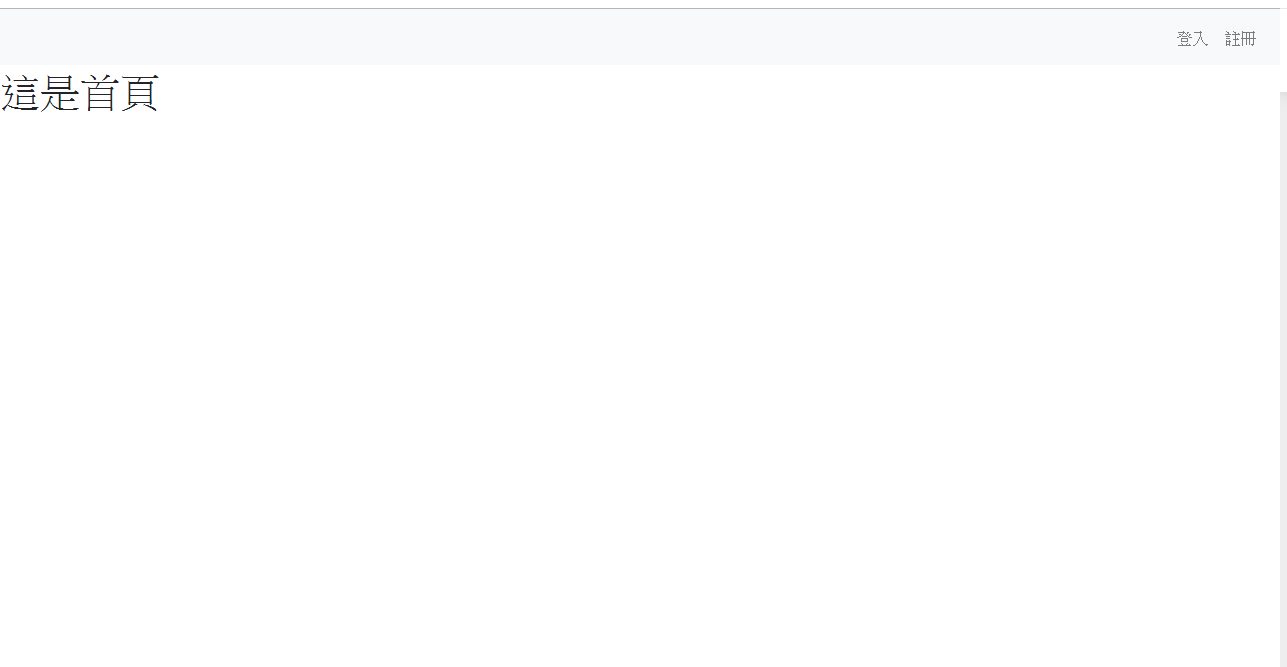

In [12]:
Image("images/P15.png")

三、登出(Logout)
==================
登出頁面比登入頁面簡單

In [ ]:
# blog/views.py

def logout(request):
    auth.logout(request)
    return redirect(reverse_lazy('index')) # 登出後導頁到 index

# MyFirstSite/urls.py

path('logout/', blog_views.logout, name="logout"), # 在 urlpatterns 中加入這一排

修改 blog/nav_accounts.html

In [ ]:
<li class="nav-item">
    <a class="nav-link" href="{% url 'logout' %}">登出</a>
</li>

接著試著登入登出看看，確認是否正常

四、註冊系統
===============
可以讓人申請網站的帳號

先做好大致上的架構後再實作

In [ ]:
# blog/views.py

def register(request):
    if request.POST:
        pass
    return render(request, 'blog/register.html')

# MyFirstSite/urls.py

path('register/', blog_views.register, name="register"), # 在 urlpatterns 中加入這一排

做出 blog/register.html

In [ ]:
<!DOCTYPE html>

<html>
    <head>
        <title>Index</title>
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css" integrity="sha384-JcKb8q3iqJ61gNV9KGb8thSsNjpSL0n8PARn9HuZOnIxN0hoP+VmmDGMN5t9UJ0Z" crossorigin="anonymous">
    </head>
    <body>
        {% include 'blog/nav_accounts.html' %}
        <div class="container">
            <h1>這是 Register 頁</h1>

            <form method="POST" action=".">
                {% csrf_token %}
                <div class="form-group">
                    <label for="name">Username</label>
                    <input class="form-control" name="username" type="text" required>
                </div>
                <div class="form-group">
                    <label for="name">Password1</label>
                    <input class="form-control" name="password1" type="password" required>
                </div>
                <div class="form-group">
                    <label for="name">Password2</label>
                    <input class="form-control" name="password2" type="password" required>
                </div>
                <input class="btn btn-primary" type="submit">
            </form>

            <p>{{ msg }}</p>
        </div>
    </body>
</html>

修改 blog/nav_accounts.html

In [ ]:
<li class="nav-item">
  <a class="nav-link" href="{% url 'register' %}">註冊</a>
</li>

確認能夠從首頁連到註冊頁面

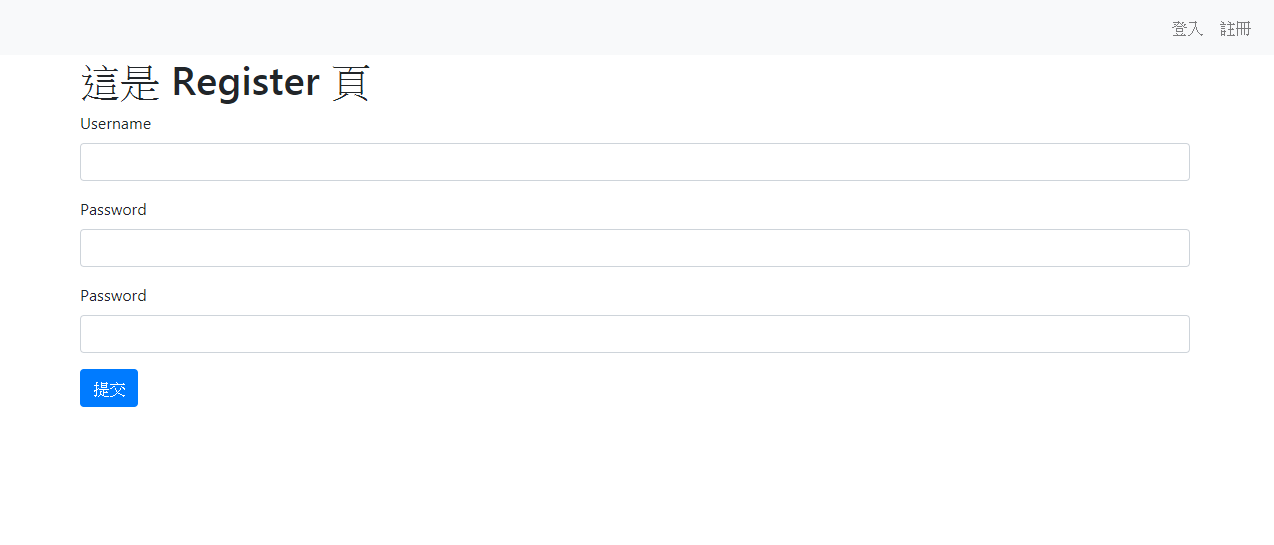

In [13]:
from IPython.display import Image
Image("images/P17.png")

接下來，實作註冊頁的程式碼

In [ ]:
# blog/views.py

from django.contrib.auth.models import User
from django.contrib.auth.hashers import make_password

def register(request):
    if request.POST:
        # 當使用者 POST 表單後運行這部分程式碼
        username = request.POST.get('username')
        password1 = request.POST.get('password1')
        password2 = request.POST.get('password2')

        if password1 == password2:
            if not User.objects.filter(username=username).exists(): # 判斷是否 username 有存在 db 內
                user = User.objects.create(
                    username=username,
                    password=make_password(password1), # 密碼加密
                )
                return redirect(reverse_lazy('login'))  # 登出後導頁到 login
            else:
                context = {
                    "msg": "此使用者帳號已被申請過",
                }
                return render(request, 'blog/register.html', context)
        else:
            context = {
                "msg": "一次密碼與二次密碼不相同",
            }
            return render(request, 'blog/register.html', context)
    return render(request, 'blog/register.html')

試著去註冊看看帳號並且拿來登入看看

五、普通帳號與管理員帳號
=======================
我們先來看看 DB 內關於 User 的 table

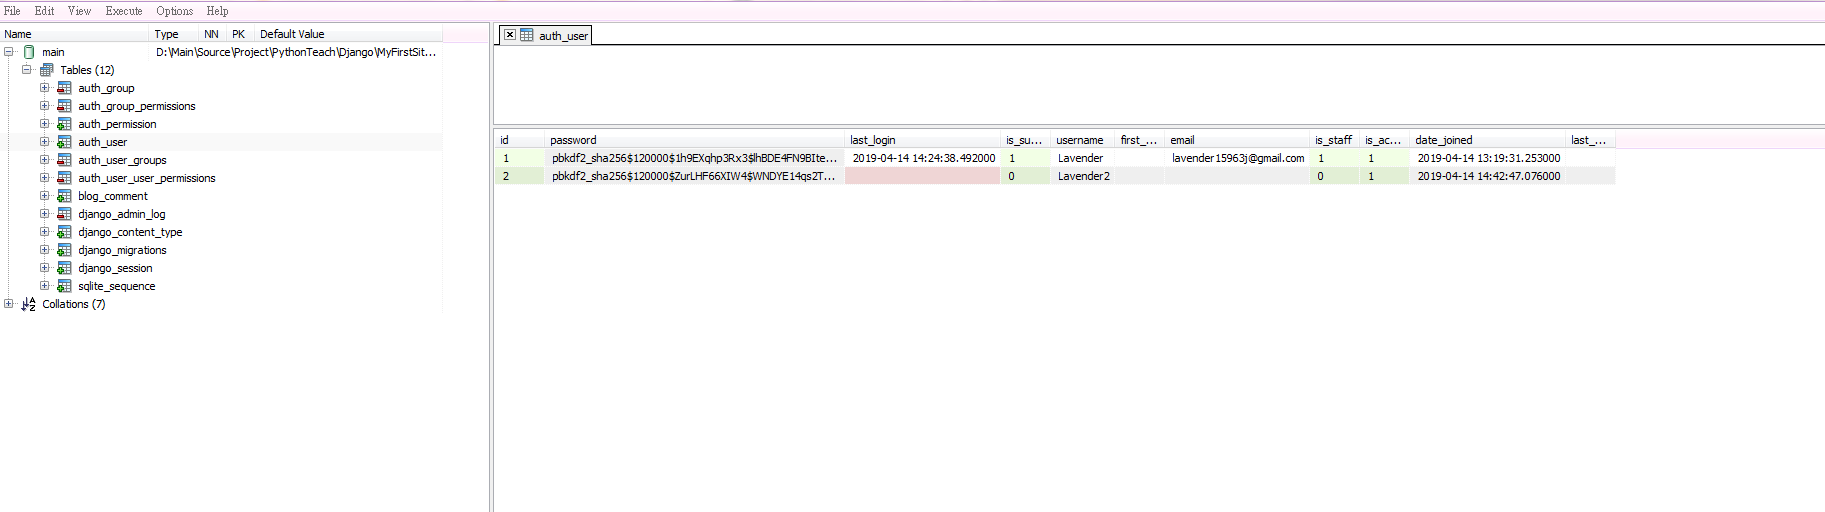

In [14]:
from IPython.display import Image
Image("images/P18.png")

會有一個欄位叫 is_superuser (Boolean)，如果我們想讓普通帳號與管理員帳號看到的頁面有不同的話，可以用同樣的方式在 template 下手

修改 blog/nav_accounts.html 變成以下的樣子

In [ ]:
{% load i18n %}

<nav class="navbar navbar-expand-lg navbar-light bg-light">
  <div class="collapse navbar-collapse" id="navbarSupportedContent">
    <ul class="navbar-nav ml-auto">
      {% if request.user.is_authenticated %}
        <li class="nav-item">
          <a class="nav-link" href="#">{{ request.user.username }}</a>
        </li>
        {% if request.user.is_superuser %}
          <li class="nav-item">
            <a class="nav-link" href="#">網站後台</a>
          </li>
        {% endif %}
        <li class="nav-item">
            <a class="nav-link" href="{% url 'logout' %}">登出</a>
          </li>
      {% else %}
        <li class="nav-item">
          <a class="nav-link" href="{% url 'login' %}">登入</a>
        </li>
        <li class="nav-item">
          <a class="nav-link" href="{% url 'register' %}">註冊</a>
        </li>
      {% endif %}
    </ul>
  </div>
</nav>

試著用不同帳號登入觀看差別

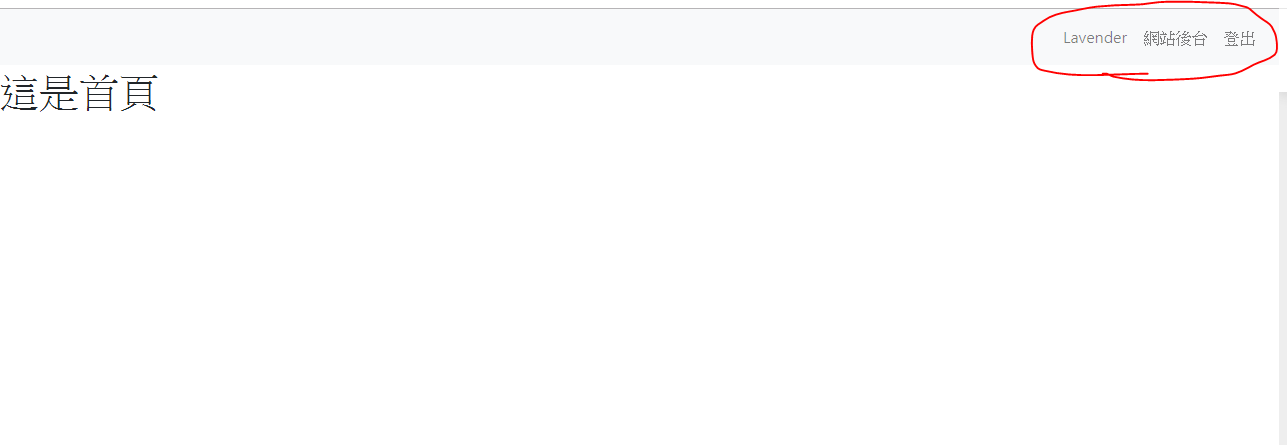

In [15]:
from IPython.display import Image
Image("images/P19.png")

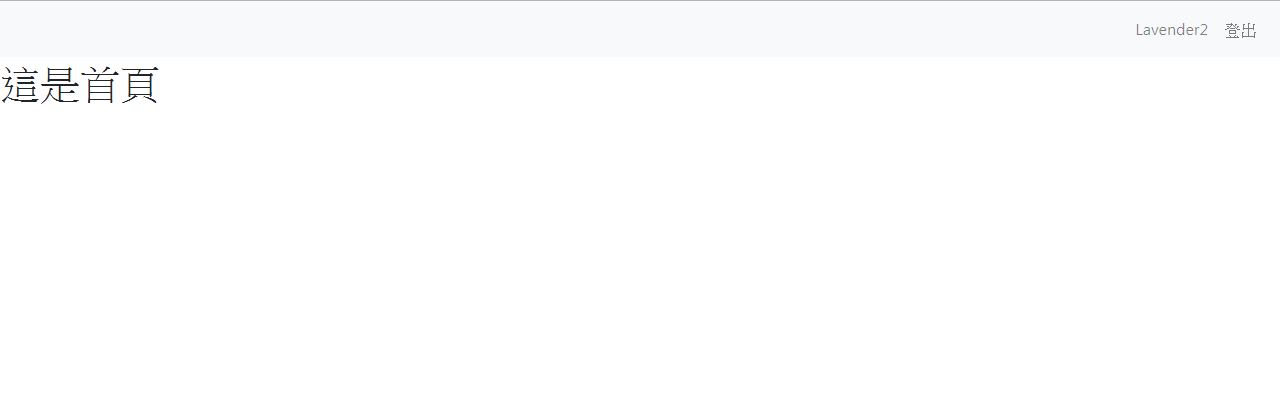

In [16]:
from IPython.display import Image
Image("images/P20.png")